In [1]:
!pip install graphviz pandoc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 868.8 kB/s eta 0:00:0031m2.0 MB/s eta 0:00:01
  Using cached pandoc-2.3.tar.gz (33 kB)
  Preparing metadata (setup.py) ... done
  Using cached plumbum-1.8.2-py3-none-any.whl.metadata (10 kB)
  Using cached ply-3.11-py2.py3-none-any.whl (49 kB)
Using cached plumbum-1.8.2-py3-none-any.whl (127 kB)
  Created wheel for pandoc: filename=pandoc-2.3-py3-none-any.whl size=33259 sha256=537292cc6b4b25b758fe7229741457f244c4ed301a1232e0a83c1313f1e4dbd9
  Stored in directory: /home/phil/.cache/pip/wheels/1c/a9/c4/6254542c4e8202d52fcd69798d2507aaad1f2a4bb60f2f0fea
Successfully built pandoc

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from graphviz import Digraph
from IPython.display import display
import numpy as np

# Machine Learning 

Decision Trees

# Decision Trees

- another supervised classification algorithm
- easy to understand, interpret and visualize
- very versatile applicable (classification and regression, linear or non-linear problems)
- use data as model, similar to KNN
- non-linear algorithm

## Terminology

- Tree: Hierarchical representation of decisions

- Node:
    - Decision Node
      <!-- 
      - Contain binary decisions
      - split data according to threshold value into left side ($\leq$) and right side ($>$)
      -->
  - Leaf Node
      <!--
      - Final Node in Tree branch
      - contain final prediction value
      -->

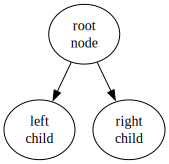

'../src/images/DT_simple_tree.svg'

In [22]:
dot = Digraph(format='svg')
dot.edges([['root\nnode', 'left\nchild'], ['root\nnode', 'right\nchild']])
display(dot)
dot.render('../src/images/DT_simple_tree')

### Example
Imagine you want to plan a dinner party. And you need to decide whether to host it inside or outside.

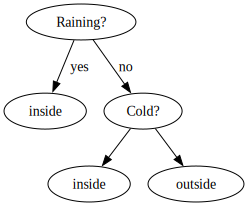

'../src/images/DT_raining_tree.svg'

In [23]:
dot = Digraph(format='svg')
dot.node("a1", 'Raining?'); dot.node("b1", "inside"); dot.node("b2", "Cold?");
dot.node("c1", "inside"); dot.node("c2", "outside");
dot.edge("a1", "b1", "yes"); dot.edge("a1", "b2", "no"); dot.edge("b2", "c1"); dot.edge("b2", "c2")
display(dot)
dot.render('../src/images/DT_raining_tree')

<img style="display:block;margin-left:auto;margin-right:auto;width:33%;" src="figures/dinner_party.png"/>

## Observation
- Split information into hirarchy of binary decisions
- Continue, until answer possible

### Building a Tree
1. split data "in the best way possible"
2. continue this process with every new left and right side, until satisfied
3. create leaf nodes for final splits, assign label of majority of remaining samples to the leaf node

## Example

Given the following linear separable data $X$ and accomodating labels $y$ find the correct split to perform binary classification
$$
X = \begin{pmatrix}
0.3\\
0.37
\end{pmatrix},
y = \begin{pmatrix}
0\\ 1
\end{pmatrix}
$$

<div style="display:flex">
    <div style="width:49%">
        The solution is clear
    </div>
    <div style="width:49%">
    or as graph
    </div>
</div>
<div style="display:flex">
    
<div style="width:49%">
$$
f(x) = 
\left\{
\begin{matrix}
0 \text{ if } x \leq 0.3\\
1 \text{ if } x > 0.3
\end{matrix}
\right.
$$
    </div>
    <div style="width:49%;">

<img style="margin-left:auto;margin-right:auto;width:30%;" src="figures/simple_lin_example.png"/>
    </div>
    </div>

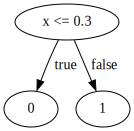

In [3]:
dot = Digraph()
dot.edge('x <= 0.3', '0', label='true'); dot.edge('x <= 0.3', '1', label='false')
display(dot)

We can break down the decision process for the numerical value $x$ and the selected threshold $0.3$ into two steps

1. Select the best possible feature  

   $\rightarrow$ Easy, there is only one feature available, $x$

2. Find a value in $x$ that separates the classes  

   $\rightarrow$ $0.3$ is the only value of a member of $0$, $0.37$ the only value of a member of $1$

With increasing amount of data points this process becomes increasingly hard to perform manually.  

Consider the following data
$$
X = \begin{pmatrix}
0.35, 0.6, 0.67, 0.8
\end{pmatrix}^T\\
y = \begin{pmatrix}
0, 0, 1, 1
\end{pmatrix}^T
$$

The optimal solution is still very clear

$$
f(x) = 
\left\{
\begin{matrix}
0 \text{ if } x \leq 0.6\\
1 \text{ if } x > 0.6
\end{matrix}
\right.
$$
or as graph

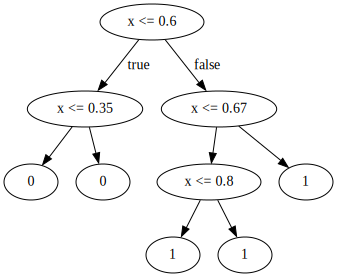

In [4]:
dot = Digraph()
# decision nodes left side
dot.node('d1', 'x <= 0.6'); dot.node('d3','x <= 0.35');
# leaf nodes left side
dot.node('l1', "0"); dot.node('l2', "0");
# decision nodes right side
dot.node('d2', 'x <= 0.67'); dot.node('d4', 'x <= 0.8');
# leaf nodes right side
dot.node('l6', "1"); dot.node('l7', "1"); dot.node('l8', "1");

# edges left side
dot.edge('d1', 'd3', label='true'); dot.edge('d3', 'l1'); dot.edge('d3', 'l2'); 
# edges right side
dot.edge('d1', 'd2', label='false'); dot.edge('d2', 'd4'); dot.edge('d2', 'l6');
dot.edge('d4', 'l7'); dot.edge('d4', 'l8'); display(dot)

<img style="display:block;margin-left:auto;margin-right:auto;width:33%;" src="figures/simple_lin_example_2.png"/>

### Non-linear
Given the following non-linear separable data $X$ and accomodating labels $y$ find the correct split to perform binary classification
$$
X = \begin{pmatrix}
0.3, 0.1, 0.21, 0.35, 0.6, 0.67, 0.8, 0.786, 0.97
\end{pmatrix}^T\\
y = \begin{pmatrix}
0, 0, 1, 0, 1, 1, 0, 1, 0
\end{pmatrix}^T
$$

In this example we can not simply split the data using visual recognition or other simple comparison methods. A different method to split the data is required.
- How to select a split?
- How can a split be measured? 
- When we have multivariant data, how to decide which feature to select and to split on?

## Information Gain
The Information Gain $Gain$ tells us how much information we gain over $x$ while looking at $y$.
- used to select a split
- measures the reduction of an impurity metric in a splitted data set
- large IG suggests low impurity and hence little surprise in split


$$
Gain(S, V) = I(S) - \sum_{S_v\in V} \frac{|S_v|}{|S|}I(S_v)
$$
with $V$ a set of splits out of $S$.  
For two splits
$$
Gain(S, V) = I(S) - \left(\frac{|S_1|}{|S|}I(S_1)+\frac{|S_2|}{|S|}I(S_2)\right)
$$

## Impurity Measures
The following metrics are calculated at the Node level. The lower their value the purer the observed data.

### Entropy
- Ranges between 0 (pure) and 1 (impure)

$$
E(S) = \sum_{i=1}^k -p_i\log_2p_i = - \sum_{i=1}^k p_i\log_2p_i
$$
with $p_i$ the probability of randomly selecting a sample of class $i$ out of the $k$ classes inside $S$

In [24]:
def entropy(s):
    counts = np.bincount(np.array(s, dtype=np.int64))
    percentages = counts / len(s)
    return -np.sum([pct*np.log2(pct) for pct in percentages if pct > 0])

In [25]:
A = np.array([0,0,0,0,0,0,0,0,0,1,1,1,1,1]) # 0: 9/14, 1: 5/14
B = np.array([0,0,0,0,0,0,0,1,1,1,1,1,1,1]) # 0: 7/14, 1: 7/14
C = np.array([0,0,0,0,0,1,1,1,1,1,1,1,1,1]) # 0: 5/14, 1: 9/14
entropy(A), entropy(B), entropy(C)

(0.9402859586706311, 1.0, 0.9402859586706311)

### GINI impurity
- ranges from 0 (pure) to 0.5 (impure)
- combines the probability of randomly selecting an item $i$,
<div style="display:flex">
    <div style="width:49%">
    $$
    p_i = \frac{|S_i|}{|S|}
    $$
    and the probability of misclassifying that item
    $$
    \sum_{j\neq i} p_j = 1 - p_i
    $$
    </div>
    <div style="width:49%">
        $$
            G(S) = \sum_{i=1}^cp_i (1 - p_i) = \sum_{i=1}^c (p_i - p_i^2)\\
            = \underbrace{\sum_{i=1}^c p_i}_{:= 1} + \sum_{i=1}^c p_i^2 = 1 - \sum_{i=1}^c p_i^2
        $$
    </div>
</div>

In [26]:
def gini_impurity(s):
    counts = np.bincount(np.array(s, dtype=int))
    percentages = counts / len(s)
    return 1 - (percentages**2).sum()

gini_impurity(A), gini_impurity(B), gini_impurity(C)

(0.4591836734693877, 0.5, 0.4591836734693877)

Both definitions lead to the following properties
- low value translates to low likelihood of misclassification
- high value translates to high likelihood of misclassification

## Prediction Error
Another impurity measure is the prediction error, the maximum probability of misclassifying a sample.
It is essentially the inverse of the maximum probability of correctly classifying a sample for any given class in $S$  
$$
E(S) = 1 - \max\{p_i\}
$$
This metric is not as useful to construct a Decision Tree as the Entropy or the GINI impurity, but can be used to "prune" one.  
_We will look into pruning once we understood how the tree is constructed._

In [27]:
def error(s):
    counts = np.bincount(np.array(s, dtype=np.int64))
    percentages = counts / len(s)
    return 1. - np.max(percentages)

error(A), error(B), error(C)

(0.3571428571428571, 0.5, 0.3571428571428571)

### Comparison
For comparison we will compute the Entropy, the GINI impurity and the prediction error for 101 different combinations of binary labels for 100 samples.

In [28]:
g = list(); e = list(); e2 = list(); err = list(); bins = list()
for i in range(101):
    values = [0] * (100 - i) + [1] * i
    g.append(gini_impurity(values))
    e.append(entropy(values))
    e2.append(np.array(entropy(values))/2.)
    err.append(error(values))
    bins.append(values)

In [29]:
import matplotlib.pyplot as plt

def draw_bins(bins, alpha=0.5):
    for idx, val in enumerate(bins):
        unique, counts = np.unique(val, return_counts=True)
        if idx == 0:
            counts = np.array([len(val), 0])
        elif idx == len(bins) - 1:
            counts = np.array([0, len(val)])
        plt.bar(
            [idx,idx+0.5], height=counts/len(val), width=0.5,
            color=['b', 'g'], label=['class 0', 'class 1'], alpha=alpha
        )

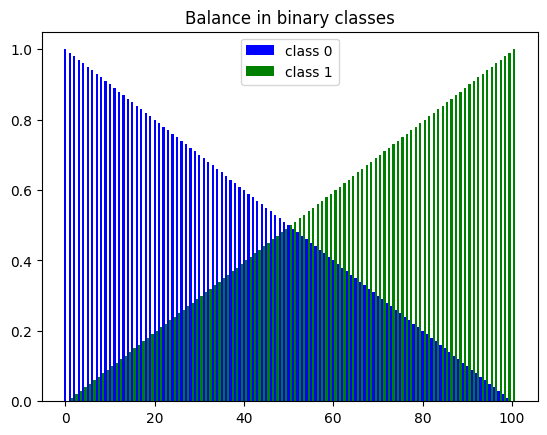

In [30]:
draw_bins(bins, alpha=1)
plt.legend(['class 0', 'class 1']); plt.title('Balance in binary classes')
plt.savefig('../src/images/DT_comparison_0.svg')
plt.show()

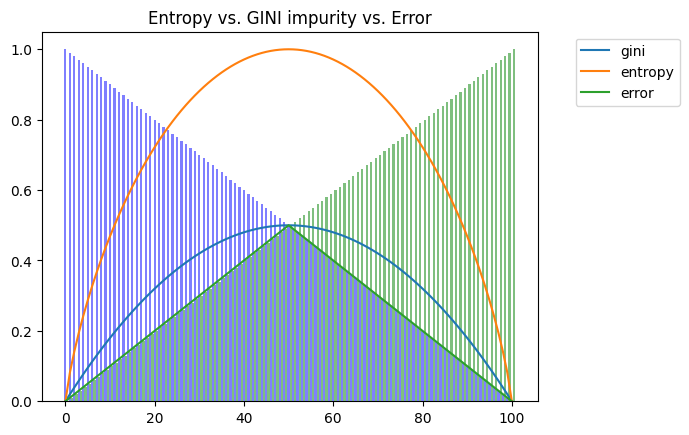

In [31]:
import matplotlib.pyplot as plt

plt.plot(np.arange(101), g, label='gini'); plt.plot(np.arange(101), e, label='entropy'); plt.plot(np.arange(101), err, label='error')
draw_bins(bins)
plt.legend(['gini', 'entropy', 'error'], loc='best', bbox_to_anchor=(0.5, 0., 0.8, 1))
plt.title('Entropy vs. GINI impurity vs. Error')
plt.savefig('../src/images/DT_comparison_1.svg')
plt.show()

Entropy ranges from $0$ pure to $1$ impure, whereas the GINI impurity and prediction error metrics range from pure $0$ to impure $0.5$.

To visualize the relationship between the tree metrics better we rescale the result of the entropy with a factor of $0.5$. This allows us to see that the GINI impurity lies between the Entropy and the prediction error.

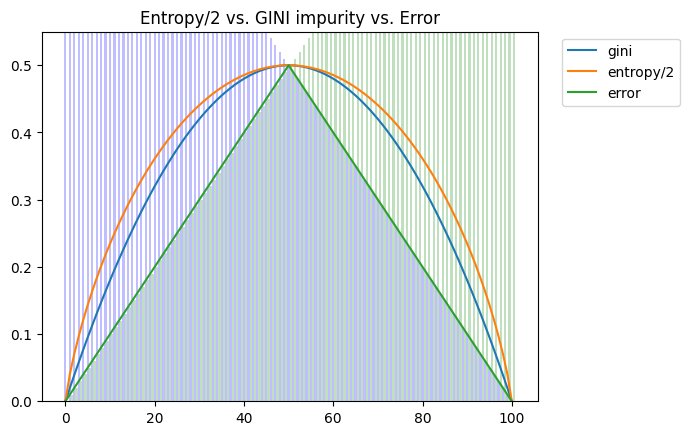

In [32]:
plt.plot(np.arange(101), g, label='gini'); plt.plot(np.arange(101), e2, label='entropy/2'); plt.plot(np.arange(101), err, label='error')
draw_bins(bins, alpha=0.25)
plt.legend(['gini', 'entropy/2', 'error'], loc='best', bbox_to_anchor=(0.5, 0., 0.8, 1))
plt.title('Entropy/2 vs. GINI impurity vs. Error'); plt.ylim([0, 0.55])
plt.savefig('../src/images/DT_comparison_2.svg')
plt.show()

Depending on the chosen metric the resulting trees can vary. Sometimes this makes a small impact, sometimes a bigger one. Overall Entropy or GINI impurity are implemented in many algorithms.  
CART (classification and regression tree) uses GINI, other implementations like ID3 and C5 use the Entropy.

Most of these implementations like [C5](https://www.rulequest.com/see5-comparison.html) are highly optimized using methods like _boosting_ that improve the structure of the trees by selecting better splits.

## Disadvantages
- deep trees are prone for overfitting
- shallow trees increase the risk of biased predictions


## Solution
Random Forest: A collection of Decision Trees whos results are aggregated into a final prediction.  
Random Forest implementations prevent overfitting without sacrificing bias.
They are more robust and generally better solvers than Decision Trees.

But today, we will implement a Decision Tree and use them on the Iris data set, as well as several other problems.

# Implementation

## Implementing information gain
To demonstrate the different impact of Entropy and GINI impurity, we will now look at different results in the information gain.

$$
Gain(S, V) = I(S) - \left(\frac{|S_1|}{|S|}I(S_1)+\frac{|S_2|}{|S|}I(S_2)\right)
$$

In [12]:
def information_gain(super_set, left_split, right_split, impurity_measure):
    p_left = len(left_split)/len(super_set)
    p_right = len(right_split)/len(super_set)
    return (
        impurity_measure(super_set)
        - (p_left * impurity_measure(left_split) + p_right * impurity_measure(right_split))
    )

In [13]:
parent = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]
left_child = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]
right_child = [0, 0, 0, 0, 1, 1, 1, 1]

print('entropy:', information_gain(parent, left_child, right_child, entropy))
print('gini:', information_gain(parent, left_child, right_child, gini_impurity))
print('error:', information_gain(parent, left_child, right_child, error))

entropy: 0.1809371414656561
gini: 0.1133333333333334
error: 0.10000000000000003


In [14]:
g = list(); e = list(); e2 = list(); err = list(); bins = list()
for i in range(1, 100):
    left = [0] * (100 - i)
    right = [1] * i
    g.append(information_gain(left + right, left, right, gini_impurity))
    e2.append(information_gain(left + right, left, right, entropy))
    err.append(information_gain(left + right, left, right, error))
    bins.append(left + right)

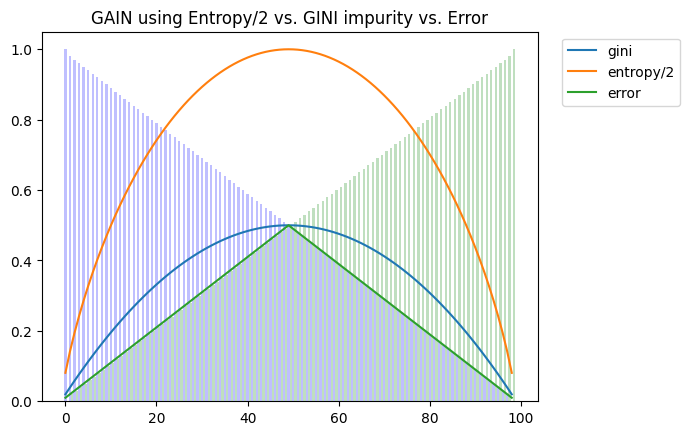

In [15]:
plt.plot(np.arange(99), g, label='gini'); plt.plot(np.arange(99), e2, label='entropy/2'); plt.plot(np.arange(99), err, label='error')
draw_bins(bins, alpha=0.25)
plt.legend(['gini', 'entropy/2', 'error'], loc='best', bbox_to_anchor=(0.5, 0., 0.8, 1))
plt.title('GAIN using Entropy/2 vs. GINI impurity vs. Error')
plt.show()

Now that we have the building blocks to select a good split of our data, we can focus on the actual algorithm of building a tree.

Essentially, all we need to do is to build a tree structure based on our input data $X$ and $y$. We do that recursively, by subdividing the data set and selecting in each iteration the best feature that causes the best possible split. The quality of a split is measured using the Information Gain.

### Pseudo-Codes
Function to build a tree:
![](./figures/code-1.png)


Recursive function to build nodes, without pruning methods:
![](./figures/code-2.png)

To finalize the implementation a method to select the best split `best_split` needs to be implemented
![](./figures/code-3.png)

Every tree built with these three methods will be as deep as the data allows it to be.  
This will inevidably cause <ins>overfitting</ins>!

## Pruning
In order to generate more shallow trees and to not run into the problem of overfitting we can introduce new **Hyperparameters** to the algorithm
- `max_depth` := Maximum depth of the tree
- `min_samples_per_split` := Minimum number of samples in a split to be subdivided

Instead of checking the number of samples in `build_node_recursive` and always split the data further, we will test against
- `depth < max_depth`
- and `n > min_samples_per_split`

and only split further if both criteria are met.

This "early exit" method is called <u>**pruning**</u>.

A third option is to calculate the prediction error `error` and configure a certain threshold that must be met to go deeper in the tree.

## Implementing a Decision Tree
In order to build a tree we must first define the structure of a node inside this tree.  
We will implement binary tree nodes, like most other implementations e.g. [sklearn](https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html).

### Implementation

We'll need two classes
- `Node` - implements a single node of a decision tree
- `DecisionTree` - implements the algorithm

The Node class is here to store the data of the selected feature, threshold, data going left and right, information gain, and the leaf node value
- All are initially set to `None`
- The leaf node value is available only for leaf nodes


In [16]:
from dataclasses import dataclass, field
from typing import Union, List, Dict

@dataclass
class Node:
    feature: int = None
    threshold: float = None
    left: 'Node' = None
    right: 'Node' = None
    information_gain: float = None
    value: Union[float, int] = None

    # relevant for visualization
    samples: int = None

The `DecisionTree` class contains a few methods

- The constructor allows providing a `decision_method` for the impurity measure that is used when selecting a good split
- The `information_gain(parent, left_child, right_child)` calculates the information gain value of a split between a parent and two children
- The `best_split(X, y)` function calculates the best splitting parameters for input features `X` and a target variable `y`
    - It does so by iterating over every column in `X` and every thresold value in every column to find the optimal split using information gain
- The `build(X, y, depth)` function recursively builds a decision tree until the data is _non splittable_
- The `fit(X, y)` function calls the `build()` function and stores the built tree to the constructor
- The `run_prediction(x, node)` function traverses the tree to classify a single instance
- The `predict(X)` function applies the `run_prediction()` function to every instance in matrix `X`

In [17]:
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import statistics


class DecisionTree(BaseEstimator):
    def __init__(self, decision_method: str = 'entropy', max_depth=1,
                 min_samples_per_split=2, precision_threshold=1/24.):
        # root node of decision tree
        self.tree: Node = None
            
        # Model HPs
        self.set_decision_method(decision_method)
        self.max_depth = max_depth
        self.min_samples_per_split = min_samples_per_split
        self.prediction_threshold = precision_threshold
        
        # internals for sklearn API
        self.is_fit_ = False

    def error(self, s):
        counts = np.bincount(np.array(s, dtype=int))
        percentages = counts / len(s)
        return 1. - np.max(percentages)

    def set_decision_method(self, decision_method):
        # impurity decision method for building the tree
        if decision_method == 'entropy':
            self.decision_method = entropy
        else:
            self.decision_method = gini_impurity
        self.decision_method_name = decision_method
    
    def get_params(self, deep=True):
        return dict(
            decision_method=self.decision_method_name,
            max_depth=self.max_depth,
            min_samples_per_split=self.min_samples_per_split,
            precision_threshold=self.prediction_threshold
        )
    
    def set_params(self, **params):
        self.max_depth = params.get('max_depth', self.max_depth)
        decision_method_name = params.get('decision_method_name', self.decision_method_name)
        if decision_method_name != self.decision_method_name:
            self._set_decision_method(decision_method_name)
        self.min_samples_per_split = params.get('min_samples_per_split', self.min_samples_per_split)
        self.prediction_threshold = params.get('precision_threshold', self.prediction_threshold)
        return self

    def information_gain(self, super_set, left_split, right_split):
        """
        Computes information gain of super_set splitted into left_split and right_split
        
        :param super_set: super set containing all values in left and right split
        :param left_split: left split of super set
        :param right_split: right split of super set
        :returns: information gain of this split
        """
        # probability of left split
        p_left = len(left_split)/len(super_set)
        # probability of right split
        p_right = len(right_split)/len(super_set)
        return (
            self.decision_method(super_set) 
            - (
                p_left * self.decision_method(left_split)
                + p_right * self.decision_method(right_split)
            )
        )

    def best_split(self, X, y):
        """
        Computes best possible split of data to achieve best value in information gain
        
        Selects best feature with it's best threshold value based on information gain
        of splitted feature set.
        

        :param X: input data set to split
        :param y: related labels
        :returns: dictionary holding best possible split, 
                  i.e. the feature, threshold, left_split, right_split, 
                  information_gain and num_samples
        """
        best = dict()
        best_info_gain = -1
        
        num_features = X.shape[1]

        # iterate over all features in the given data set
        for feat in range(num_features):
            eN = np.zeros(num_features)
            eN[feat] = 1
            features = X @ eN
            # search best threshold value by iterating over every value in given feature
            for threshold in features:
                # combine X and y for splits
                df = np.c_[X, y]
                # left side split :=  val <= threshold
                left_indices = df[:,feat] <= threshold
                left_split = df[left_indices]
                # right side split := val > threshold
                right_split = df[np.logical_not(left_indices)]

                # only allow split if both sides contain values
                if len(left_split) > 0 and len(right_split) > 0:
                    # calculate information gain of split based on labels
                    gain = self.information_gain(y, left_split[:,-1], right_split[:,-1])
                    if gain > best_info_gain:
                        best = dict(
                            feature=feat,
                            threshold=threshold,
                            left_split=left_split,
                            right_split=right_split,
                            information_gain=gain,
                            num_samples=len(X)
                        )
                        best_info_gain = gain
        return best

    def build(self, X, y, depth=0):
        """
        Recursive method to build a decision tree my subdividing data.
        
        If X contains more than one sample, splits the data set further.
        Else returns a leaf node

        :param X: input data set to use to build the tree [samples x features]
        :param y: related labels
        :returns: the next node
        """
        if (self.error(y) > self.prediction_threshold and X.shape[0] > 1):
            # no leaf node, split further
            best = self.best_split(X, y)
            if best and best['information_gain'] > 0:
                # build left child of node
                left = self.build(
                    best['left_split'][:,:-1],
                    best['left_split'][:,-1],
                    depth + 1
                )
                # build right child of node
                right = self.build(
                    best['right_split'][:,:-1],
                    best['right_split'][:,-1],
                    depth + 1
                )
                return Node(
                    left=left,
                    right=right,
                    feature=best['feature'],
                    threshold=best['threshold'],
                    information_gain=best['information_gain'],
                    samples=best['num_samples']
                )
        # node is final leaf-node
        return Node(value=statistics.mode(y), samples=len(X))

    def run_prediction(self, x, node: Node):
        """
        Recursive method to perform prediction by traversing the DecisionTree.
        
        :param x: single input vector to predict a label for
        :param node: the current node
        :returns: a leaf node value
        """        
        # if final leaf-node found, return it's value
        if node.value is not None:
            return node.value

        # make prediction based on node feature
        feature = x[node.feature]
        
        if feature <= node.threshold:
            return self.run_prediction(x, node.left)
        
        return self.run_prediction(x, node.right)

    def fit(self, X, y):
        """
        Fit DecisionTree to data.
        
        Uses recursive method to build tree structure
        
        :param X: train input values [samples x features]
        :param y: related class labels
        :returns: built DecisionTree instance
        """
        self.tree = self.build(X, y)
        self.is_fit_ = True
        return self

    def predict(self, X):
        """
        Prediction method for set of samples
        
        :param X: set of samples to predict [samples x features]
        :returns: predicted labels
        """
        return np.array([self.run_prediction(xi, self.tree) for xi in X])
    
    def score(self, X, y):
        return accuracy_score(self.predict(X), y)

## Application Example

In [18]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris['data']
y = iris['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3., random_state=42)

In [19]:
model = DecisionTree()
model.fit(X_train, y_train)
preds = model.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score, f1_score

entropy_acc = accuracy_score(y_test, preds)
entropy_f1 = f1_score(y_test, preds, average=None)
entropy_acc, entropy_f1

(0.98, array([1.        , 0.96774194, 0.96774194]))

## Tree visualization
To visualize the tree all nodes need to be traversed.

The following code snippet builds a text representation of the tree.  
Each tabulator indentation is a level in depth. Left nodes are marked with the prefix `L:`, right nodes with `R:`. 

In [21]:
def print_node(node, side='', depth=0):
    if node.value is not None:
        print('\t'*depth + f'{side}label = {int(node.value)}')
    else:
        print('\t'*depth + f'{side}feature({node.feature}) treshold({node.threshold}) IG({node.information_gain})')
        if node.left:
            print_node(node.left, f'L (x_{node.feature} <= {node.threshold}): ', depth+1)
        if node.right:
            print_node(node.right, f'R (x_{node.feature} > {node.threshold}): ', depth+1)

In [23]:
print_node(model.tree, 'Root: ')

Root: feature(2) treshold(1.9) IG(0.8931734583778569)
	L (x_2 <= 1.9): label = 0
	R (x_2 > 1.9): feature(3) treshold(1.7) IG(0.6401256327540003)
		L (x_3 <= 1.7): feature(2) treshold(5.1) IG(0.1922090910245527)
			L (x_2 <= 5.1): feature(3) treshold(1.4) IG(0.10900784723716897)
				L (x_3 <= 1.4): label = 1
				R (x_3 > 1.4): feature(1) treshold(2.5) IG(0.4464393446710155)
					L (x_1 <= 2.5): feature(0) treshold(6.0) IG(0.9182958340544896)
						L (x_0 <= 6.0): label = 2
						R (x_0 > 6.0): label = 1
					R (x_1 > 2.5): label = 1
			R (x_2 > 5.1): label = 2
		R (x_3 > 1.7): label = 2


### Comparing Entropy to GINI Trees

In [24]:
gini_model = DecisionTree(decision_method='gini')
gini_model.fit(X_train, y_train)
preds = gini_model.predict(X_test)

In [25]:
print(f'Equal accuracy? {accuracy_score(y_test, preds) - entropy_acc == 0}')
print(f'Equal f1-score? {(f1_score(y_test, preds, average=None) - entropy_f1).mean() == 0}')

Equal accuracy? True
Equal f1-score? True


In [26]:
%%capture output
print_node(model.tree, 'Root: ')

In [27]:
entropy_string = output.stdout

In [28]:
%%capture output
print_node(gini_model.tree, 'Root: ')

In [29]:
gini_string = output.stdout

In [30]:
%%bash -s "$entropy_string" "$gini_string"
diff <(echo "$1") <(echo "$2") || true

1c1
< Root: feature(2) treshold(1.9) IG(0.8931734583778569)
---
> Root: feature(2) treshold(1.9) IG(0.32087246376811596)
3,11c3,9
< 	R (x_2 > 1.9): feature(3) treshold(1.7) IG(0.6401256327540003)
< 		L (x_3 <= 1.7): feature(2) treshold(5.1) IG(0.1922090910245527)
< 			L (x_2 <= 5.1): feature(3) treshold(1.4) IG(0.10900784723716897)
< 				L (x_3 <= 1.4): label = 1
< 				R (x_3 > 1.4): feature(1) treshold(2.5) IG(0.4464393446710155)
< 					L (x_1 <= 2.5): feature(0) treshold(6.0) IG(0.9182958340544896)
< 						L (x_0 <= 6.0): label = 2
< 						R (x_0 > 6.0): label = 1
< 					R (x_1 > 2.5): label = 1
---
> 	R (x_2 > 1.9): feature(3) treshold(1.7) IG(0.3681068842808487)
> 		L (x_3 <= 1.7): feature(2) treshold(5.1) IG(0.08895044629116648)
> 			L (x_2 <= 5.1): feature(0) treshold(4.9) IG(0.023238925199709437)
> 				L (x_0 <= 4.9): feature(1) treshold(2.4) IG(0.5)
> 					L (x_1 <= 2.4): label = 1
> 					R (x_1 > 2.4): label = 2
> 				R (x_0 > 4.9): label = 1


### More Applications

In [32]:
def test_ds(X, y, min_samples_per_split=2, max_depth=10, decision_method='entropy'):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = DecisionTree(min_samples_per_split, max_depth, decision_method, 1/12.)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f'Testing classification of {len(np.unique(y_train))} classes')
    print(f'Using {X_train.shape[1]} features and {X_train.shape[0]} samples')
    print(f'Accuracy: {accuracy_score(y_test, preds)}\nF1: {f1_score(y_test, preds, average=None)}\n')
    return model

def test_sklearn_ds(load_ds, decision_method='entropy'):
    df = load_ds()
    return test_ds(df["data"], df["target"], decision_method)

In [33]:
from sklearn.datasets import load_breast_cancer, load_wine

b1 = test_sklearn_ds(load_breast_cancer)
b2 = test_sklearn_ds(load_breast_cancer, 'gini')

a1 = test_sklearn_ds(load_wine)
a2 = test_sklearn_ds(load_wine, 'gini')

Testing classification of 2 classes
Using 30 features and 455 samples
Accuracy: 0.9210526315789473
F1: [0.89156627 0.93793103]

Testing classification of 2 classes
Using 30 features and 455 samples
Accuracy: 0.9298245614035088
F1: [0.9047619  0.94444444]

Testing classification of 3 classes
Using 13 features and 142 samples
Accuracy: 0.9444444444444444
F1: [0.96551724 0.96551724 0.85714286]

Testing classification of 3 classes
Using 13 features and 142 samples
Accuracy: 0.9166666666666666
F1: [0.89655172 0.92857143 0.93333333]



In [34]:
%%capture output
print_node(a1.tree, 'Root: ')

In [35]:
entropy_string = output.stdout

In [36]:
%%capture output
print_node(a2.tree, 'Root: ')

In [37]:
gini_string = output.stdout

In [38]:
%%bash -s "$entropy_string" "$gini_string"
diff <(echo "$1") <(echo "$2") || true

1,9c1,9
< Root: feature(11) treshold(2.15) IG(0.7002232062332747)
< 	L (x_11 <= 2.15): feature(9) treshold(3.8) IG(0.360358719526336)
< 		L (x_9 <= 3.8): label = 1
< 		R (x_9 > 3.8): label = 2
< 	R (x_11 > 2.15): feature(0) treshold(12.72) IG(0.7174690091208893)
< 		L (x_0 <= 12.72): label = 1
< 		R (x_0 > 12.72): feature(12) treshold(630.0) IG(0.38627583250189707)
< 			L (x_12 <= 630.0): label = 1
< 			R (x_12 > 630.0): label = 0
---
> Root: feature(9) treshold(3.8) IG(0.25370839458322103)
> 	L (x_9 <= 3.8): label = 1
> 	R (x_9 > 3.8): feature(6) treshold(1.39) IG(0.4274567901234567)
> 		L (x_6 <= 1.39): label = 2
> 		R (x_6 > 1.39): feature(12) treshold(714.0) IG(0.2332444444444446)
> 			L (x_12 <= 714.0): feature(0) treshold(13.05) IG(0.19753086419753085)
> 				L (x_0 <= 13.05): label = 1
> 				R (x_0 > 13.05): label = 0
> 			R (x_12 > 714.0): label = 0


In [39]:
%%capture output
print_node(b1.tree, 'Root: ')

In [40]:
gini_string = output.stdout

In [41]:
%%capture output
print_node(b2.tree, 'Root: ')

In [42]:
gini_string = output.stdout

In [43]:
%%bash -s "$entropy_string" "$gini_string"
diff <(echo "$1") <(echo "$2") || true

1,9c1,9
< Root: feature(11) treshold(2.15) IG(0.7002232062332747)
< 	L (x_11 <= 2.15): feature(9) treshold(3.8) IG(0.360358719526336)
< 		L (x_9 <= 3.8): label = 1
< 		R (x_9 > 3.8): label = 2
< 	R (x_11 > 2.15): feature(0) treshold(12.72) IG(0.7174690091208893)
< 		L (x_0 <= 12.72): label = 1
< 		R (x_0 > 12.72): feature(12) treshold(630.0) IG(0.38627583250189707)
< 			L (x_12 <= 630.0): label = 1
< 			R (x_12 > 630.0): label = 0
---
> Root: feature(7) treshold(0.05074) IG(0.3228506003311422)
> 	L (x_7 <= 0.05074): label = 1
> 	R (x_7 > 0.05074): feature(27) treshold(0.1465) IG(0.08062415764237627)
> 		L (x_27 <= 0.1465): feature(22) treshold(114.3) IG(0.3125788497217069)
> 			L (x_22 <= 114.3): feature(1) treshold(20.76) IG(0.2975206611570247)
> 				L (x_1 <= 20.76): label = 1
> 				R (x_1 > 20.76): label = 0
> 			R (x_22 > 114.3): label = 0
> 		R (x_27 > 0.1465): label = 0


## Graphical Tree Visualization
### Decision Tree Plot
A widely used tool to use to graphically visualize Decision Trees is `graphviz`. A short demonstration was shown in the beginning of this notebook.  
Below follows a visualization of the here implemented `DecisionTree` class.

In [44]:
def visualize_node(node: Node, dot: Digraph, decision_method_name: str, 
                   feature_names=None, target_names=None, depth: int = 0) -> str:
    """Recursive implementation of node visualization using graphviz.Digraph"""
    if node is None:
        return
    current_name = f"({depth})\n"
    if node.information_gain:
        current_name += f"GAIN({decision_method_name}) = {node.information_gain:4.3f}\n"
        
    current_name += f"samples = {node.samples}\n"
    if node.value is not None:
        if target_names is None:
            current_name += f"label = {int(node.value)}"
        else:
            current_name += f"label = {target_names[int(node.value)]}"
        dot.node(current_name, style='filled', fillcolor='lightgreen')
        return current_name
    elif node.feature is not None:
        if feature_names is None:
            current_name += f"x[{node.feature}]"
        else:
            current_name += feature_names[node.feature]
        
        current_name += f" <= {node.threshold}"
    else:
        current_name += "root"

    dot.node(current_name)
    if node.left:
        left_name = visualize_node(node.left, dot, decision_method_name, feature_names, target_names, depth + 1)
        dot.edge(current_name, left_name)
    if node.right:
        right_name = visualize_node(node.right, dot, decision_method_name, feature_names, target_names, depth + 1)
        dot.edge(current_name, right_name)
    return current_name

def visualize_tree(tree: DecisionTree, feature_names=None, target_names=None) -> None:
    """Helper method to visualize DecisionTree instance"""
    base_node = tree.tree
    dot = Digraph()
    
    dot.attr('node', shape='box')
    visualize_node(base_node, dot, tree.decision_method_name, feature_names, target_names)
    display(dot)

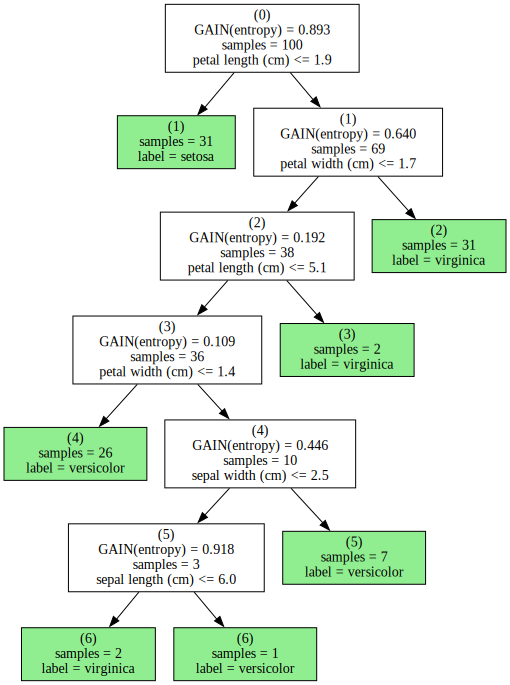

In [45]:
visualize_tree(model, iris.feature_names, iris.target_names)

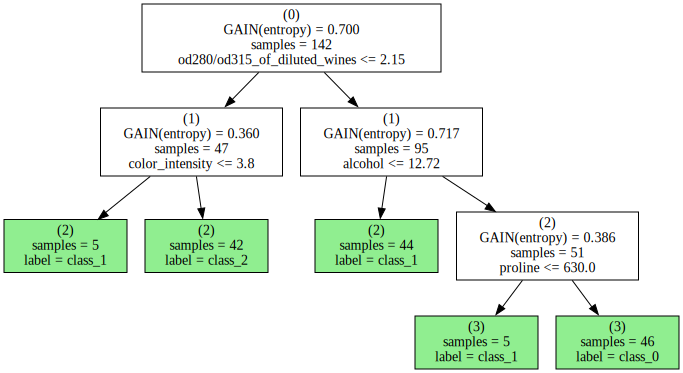

In [46]:
wine = load_wine(); visualize_tree(a1, wine.feature_names, wine.target_names)

### Decision Boundary Plot

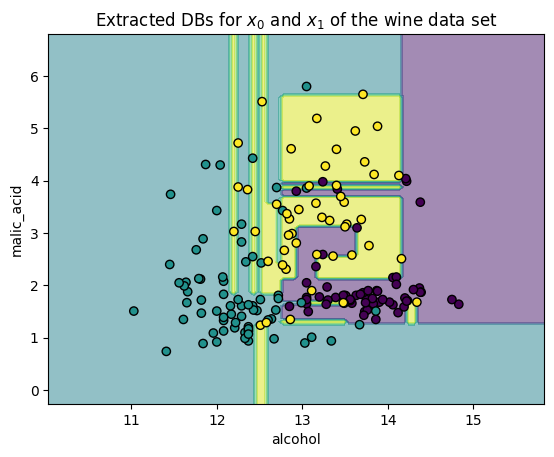

In [50]:
from sklearn.inspection import DecisionBoundaryDisplay

wine = load_wine()
feature_1, feature_2 = np.meshgrid(
    np.linspace(wine.data[:, 0].min(), wine.data[:, 0].max()),
    np.linspace(wine.data[:, 1].min(), wine.data[:, 1].max())
)
grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T
tree = DecisionTree().fit(wine.data[:, :2], wine.target)
y_pred = np.reshape(tree.predict(grid), feature_1.shape)
disp = DecisionBoundaryDisplay.from_estimator(
    tree, grid, response_method="predict",
    xlabel=wine.feature_names[0], ylabel=wine.feature_names[1],
    alpha=0.5,
)
disp.ax_.scatter(wine.data[:, 0], wine.data[:, 1], c=wine.target, edgecolor="k")
plt.title('Extracted DBs for $x_0$ and $x_1$ of the wine data set')
plt.show()